<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/analise_conjunto_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do conjunto teste

Neste notebook será feito uma avaliação do modelo avaliando o seu desempenho no conjunto teste

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [ ]:
def metricas(y_teste,y_pred):
  print('R2 Score',r2_score(y_teste,y_pred))
  print('MAE',mean_absolute_error(y_teste,y_pred))
  print('RMSE',np.sqrt(mean_squared_error(y_teste,y_pred)))
  print('MAPE',mean_absolute_percentage_error(y_teste,y_pred))
  print('RMSLE',mean_squared_log_error(y_teste,y_pred,squared=False))

In [ ]:
def rmse(y_teste,y_pred):
  return np.sqrt(mean_squared_error(y_teste,y_pred))

In [ ]:
teste = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de resultados_test.csv')
teste.drop(['Unnamed: 0','date','stock'],axis=1,inplace=True)
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772


In [ ]:
# criando uma coluna da variação da estimativa com o preço real
teste['dif']  = (np.abs(teste['y_pred']-teste['price'])/teste.price)*100

In [ ]:
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,5.641443
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,44.986959
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,70.841671
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,167.530789
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,325.556433


In [ ]:
metricas(teste.price,teste.y_pred)

R2 Score 0.5544486516453371
MAE 9.653950825533121
RMSE 25.836853597896393
MAPE 0.37026476364704186
RMSLE 0.4330107018774164


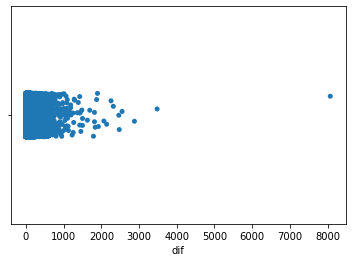

In [ ]:
sns.stripplot(x='dif',data=teste)

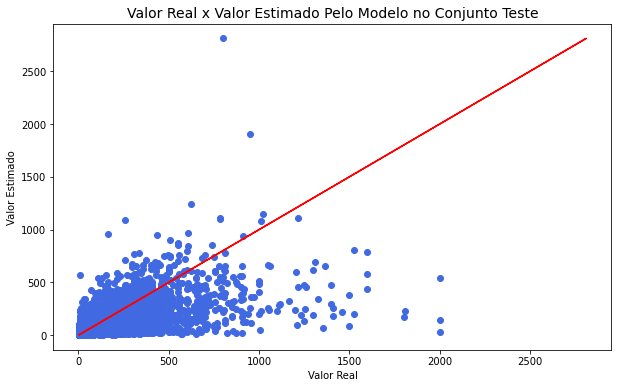

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Valor Real x Valor Estimado Pelo Modelo no Conjunto Teste',
          fontsize=14)
plt.plot(teste.y_pred,teste.y_pred,color='red')
plt.scatter(teste.price,teste.y_pred,color='royalblue')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado');

Separação pelo cluster no preço

In [ ]:
cluster = []
for i in teste.price:
  if i >= 3 and i <= 42:
    cluster.append(0)
  elif i >= 42.5 and i <= 141:
    cluster.append(1)
  elif i >= 142 and i <= 481:
    cluster.append(3)
  elif i >= 484:
    cluster.append(2)

In [ ]:
teste['cluster'] = cluster
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif,cluster
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,5.641443,0
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,44.986959,0
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,70.841671,0
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,167.530789,0
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,325.556433,0


In [ ]:
teste['cluster'].value_counts()

0    344827
1     49291
3      5593
2       338
Name: cluster, dtype: int64

In [ ]:
cl = []
for j in teste['cluster'].value_counts().index:
  cl.append(f'cluster {j}')

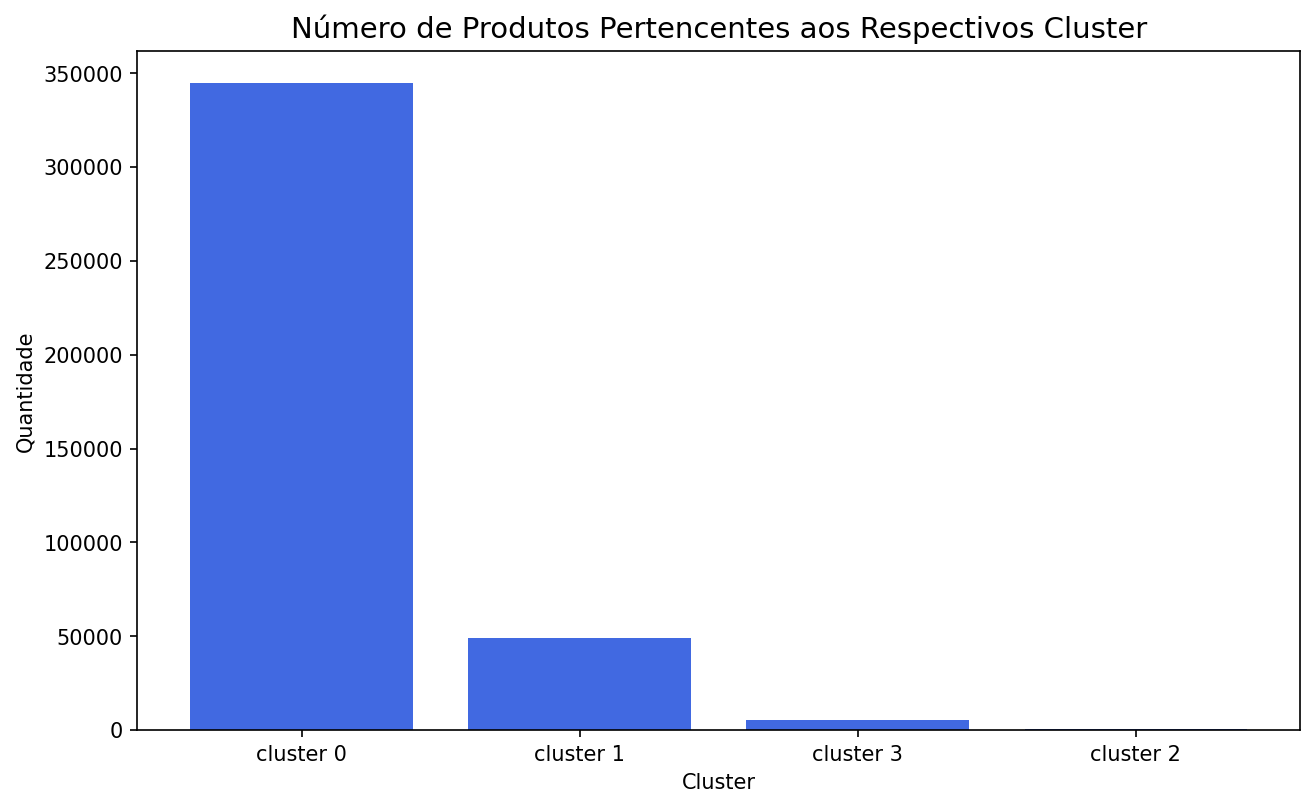

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Número de Produtos Pertencentes aos Respectivos Cluster',
          fontsize=14)
plt.bar(cl,teste['cluster'].value_counts(),color='royalblue')
plt.xlabel('Cluster')
plt.ylabel('Quantidade');

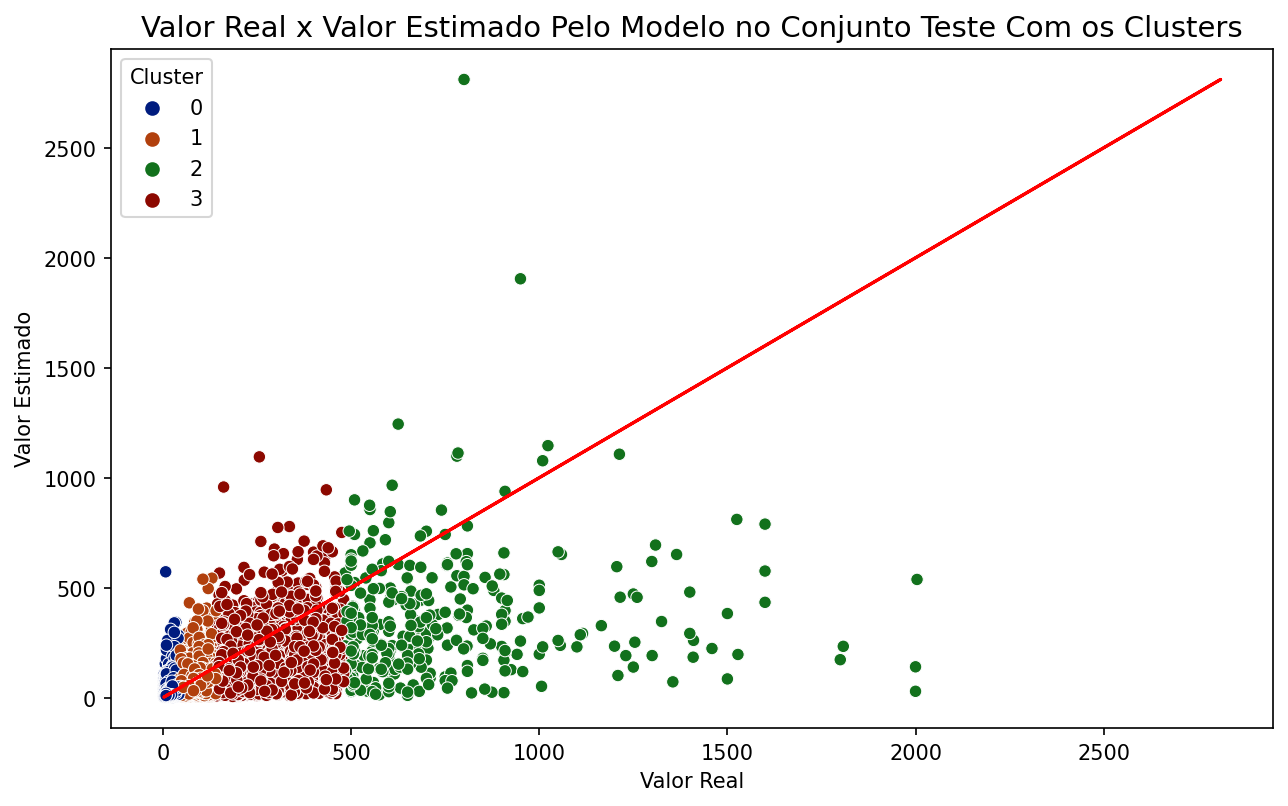

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Valor Real x Valor Estimado Pelo Modelo no Conjunto Teste Com os Clusters',
          fontsize=14)
plt.plot(teste.y_pred,teste.y_pred,color='red')
sns.scatterplot(x='price',y='y_pred',data=teste,hue='cluster',
                palette='dark')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado')
plt.legend(title='Cluster');

In [ ]:
metricas(teste[teste['cluster']!=2]['price'],teste[teste['cluster']!=2]['y_pred'])

R2 Score 0.5833915278470794
MAE 9.28493702880256
RMSE 20.338905922678666
MAPE 0.37009435922389966
RMSLE 0.4314495645373481


In [ ]:
estimativa = []
for o in teste.dif:
  if o <= 10:
    estimativa.append('boa')
  elif o > 10 and o <= 35:
    estimativa.append('na média')
  else:
    estimativa.append('ruim')

In [ ]:
teste['estimativa'] = estimativa

In [ ]:
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif,cluster,estimativa
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,5.641443,0,boa
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,44.986959,0,ruim
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,70.841671,0,ruim
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,167.530789,0,ruim
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,325.556433,0,ruim


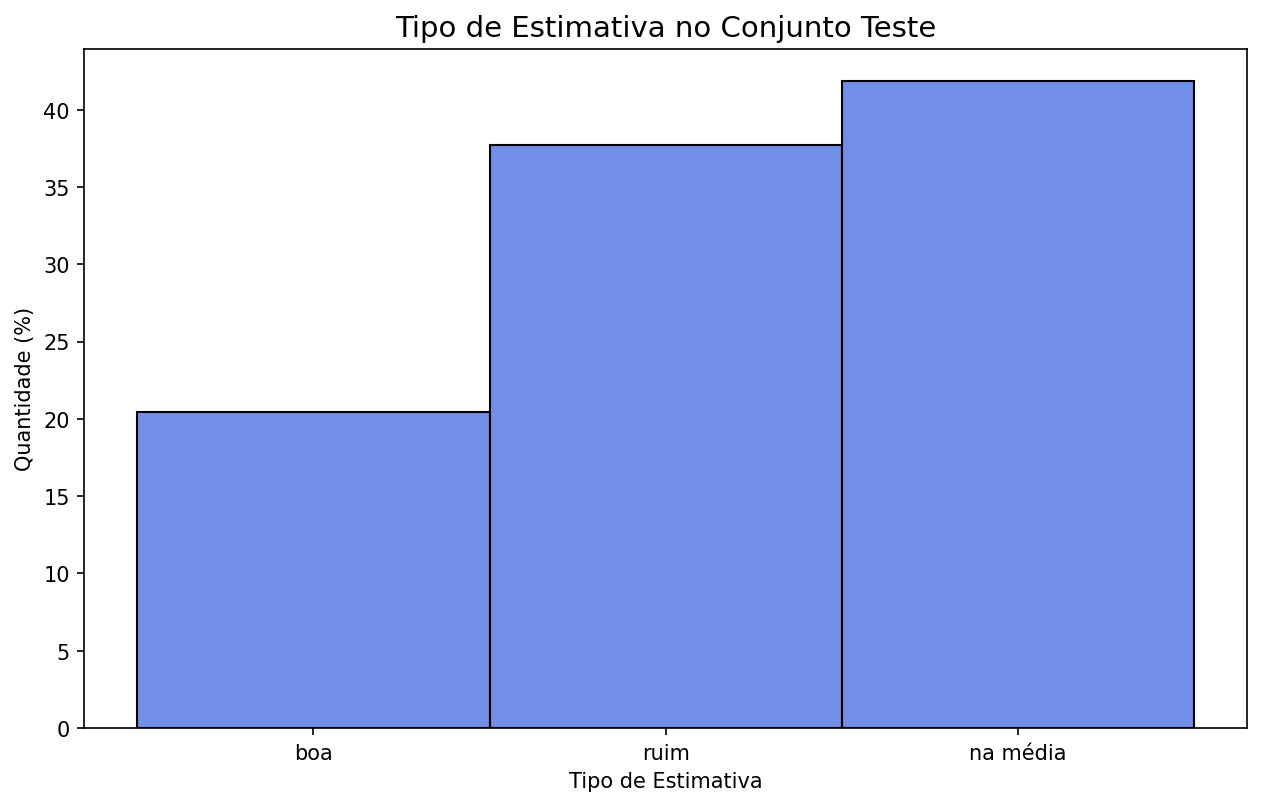

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa no Conjunto Teste',fontsize=14)
sns.histplot(x='estimativa',data=teste,color='royalblue',stat='percent')
plt.xlabel('Tipo de Estimativa')
plt.ylabel('Quantidade (%)');

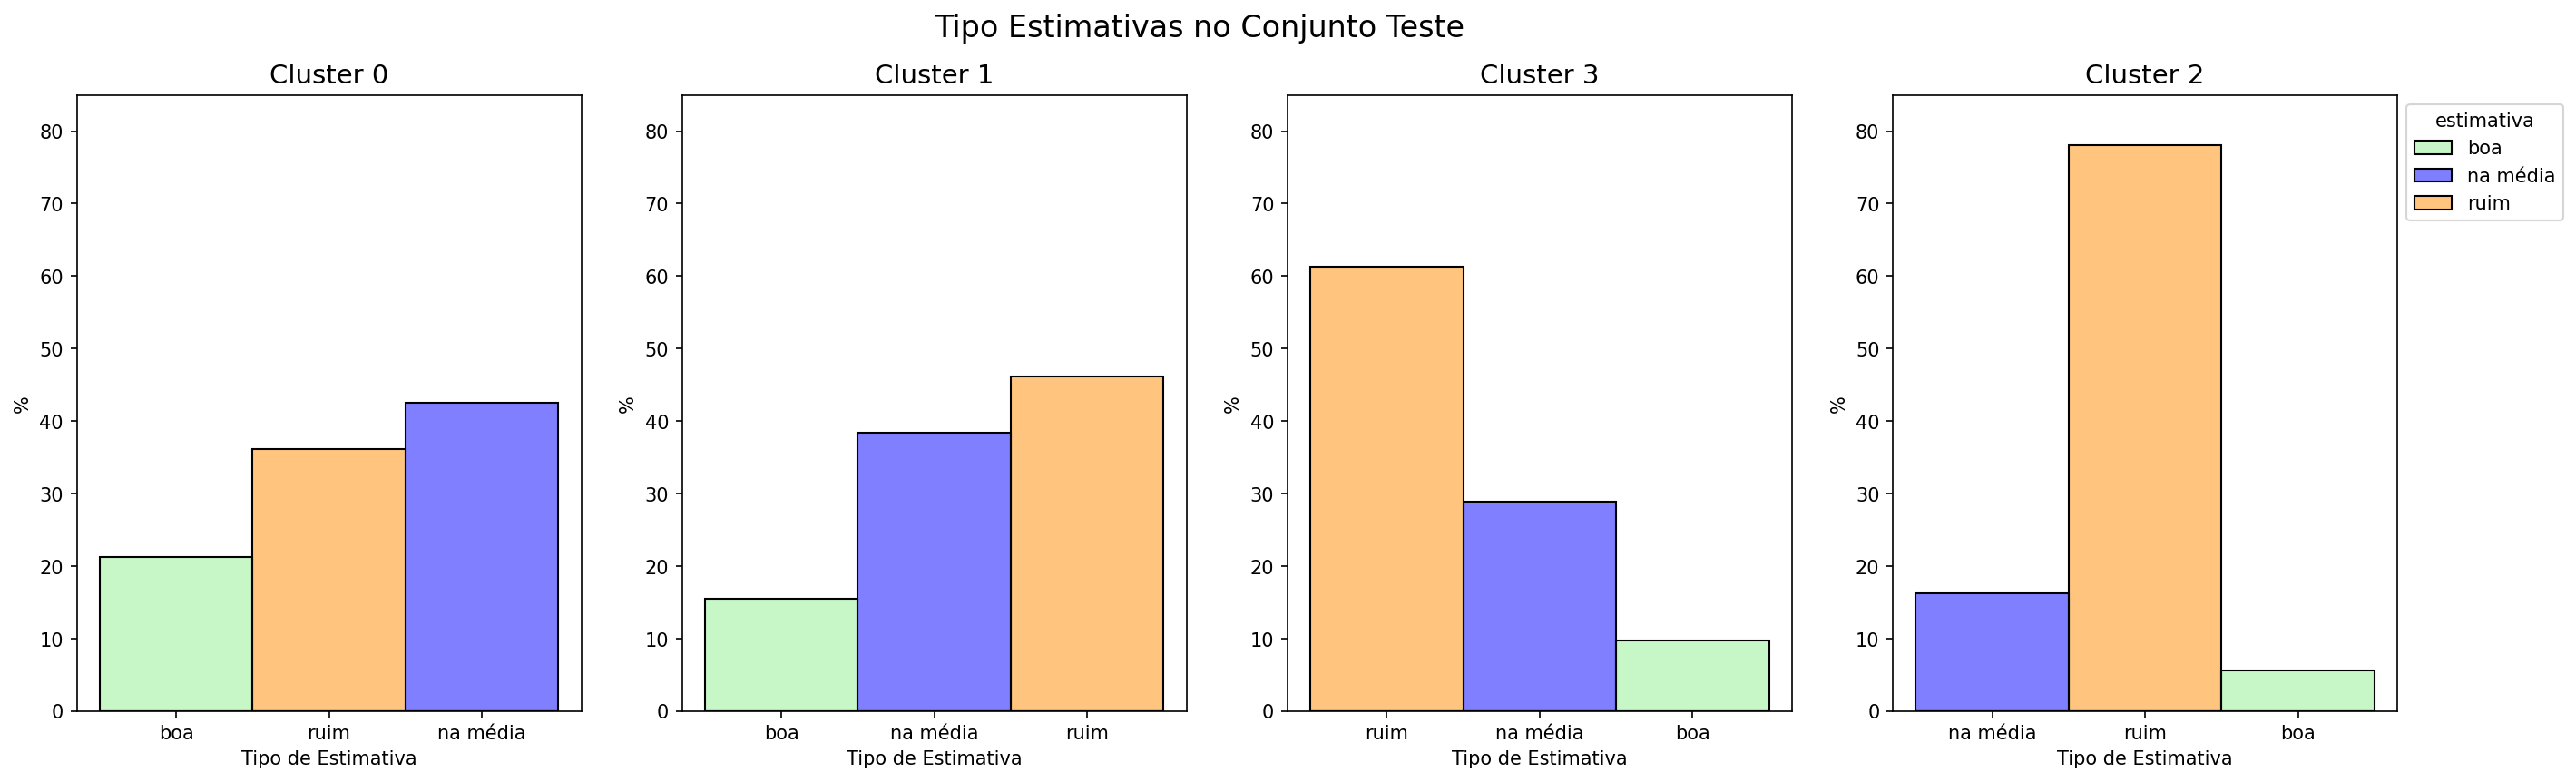

In [ ]:
plt.figure(figsize=(22,6),dpi=150)

plt.suptitle('Tipo Estimativas no Conjunto Teste',fontsize=16)

plt.subplot(1,4,1)
plt.title('Cluster 0',fontsize=14)
fig1 = sns.histplot(x='estimativa',data=teste[teste['cluster']==0],stat='percent',hue='estimativa',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.legend(frameon=False)
plt.ylim(0,85)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,2)
plt.title('Cluster 1',fontsize=14)
sns.histplot(x='estimativa',data=teste[teste['cluster']==1],stat='percent',hue='estimativa',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.legend(frameon=False)
plt.ylim(0,85)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,3)
plt.title('Cluster 3',fontsize=14)
sns.histplot(x='estimativa',data=teste[teste['cluster']==3],stat='percent',
             hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.ylim(0,85)
plt.legend(frameon=False)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,4)
plt.title('Cluster 2',fontsize=14)
fig1 =sns.histplot(x='estimativa',data=teste[teste['cluster']==2],stat='percent',
             hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.ylim(0,85)
sns.move_legend(fig1, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%');

In [ ]:
mae = []
for k in teste['category_1'].unique():
  mae1 = mean_absolute_error(teste[teste['category_1']==f'{k}']['price'],teste[teste['category_1']==f'{k}']['y_pred'])
  mae.append(mae1)

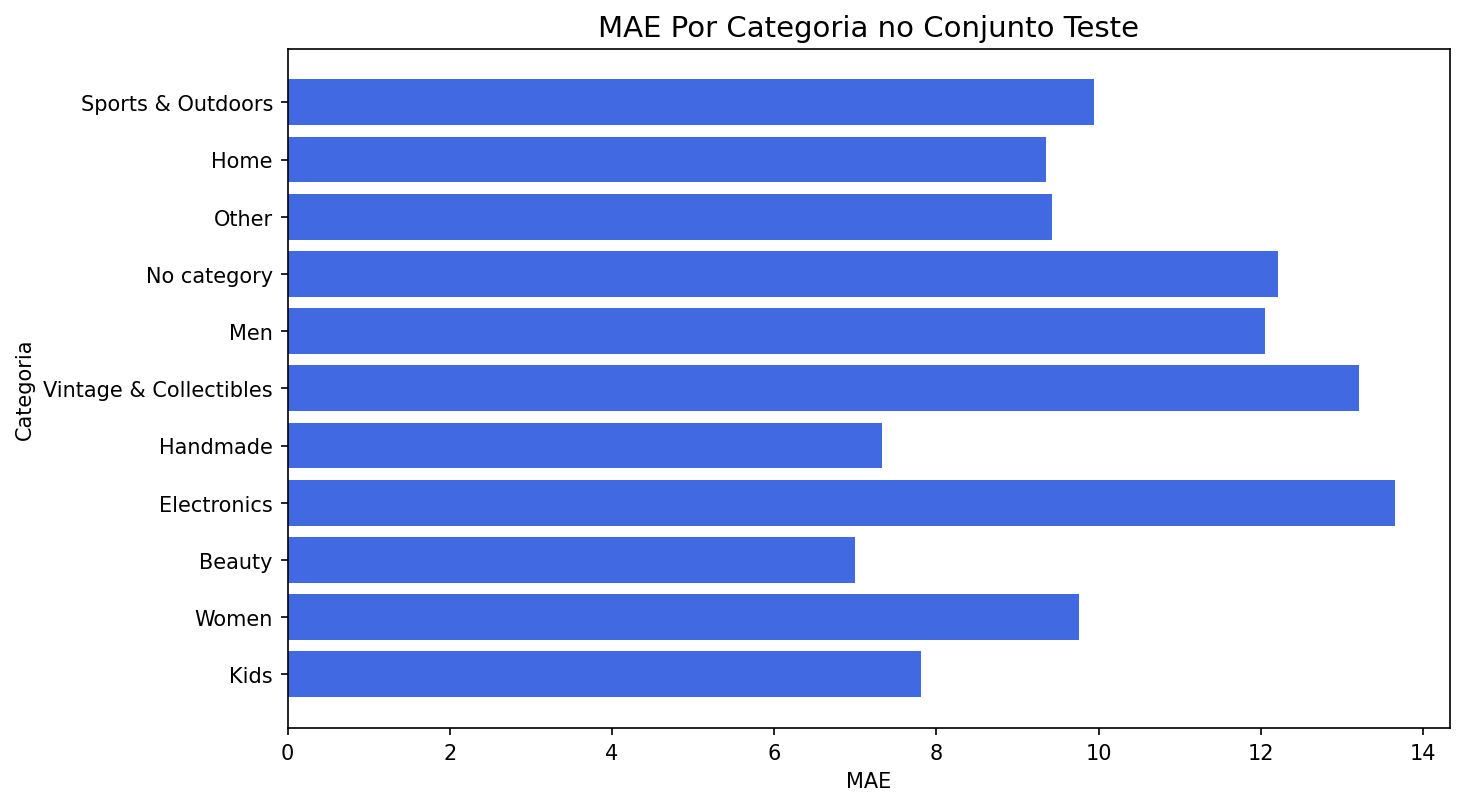

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('MAE Por Categoria no Conjunto Teste',fontsize=14)
plt.barh(teste['category_1'].unique(),mae,color='royalblue')
plt.xlabel('MAE')
plt.ylabel('Categoria');

In [ ]:
r2_sc = []
for k in teste['category_1'].unique():
  r2 = r2_score(teste[teste['category_1']==k]['price'],teste[teste['category_1']==k]['y_pred'])
  r2_sc.append(r2)

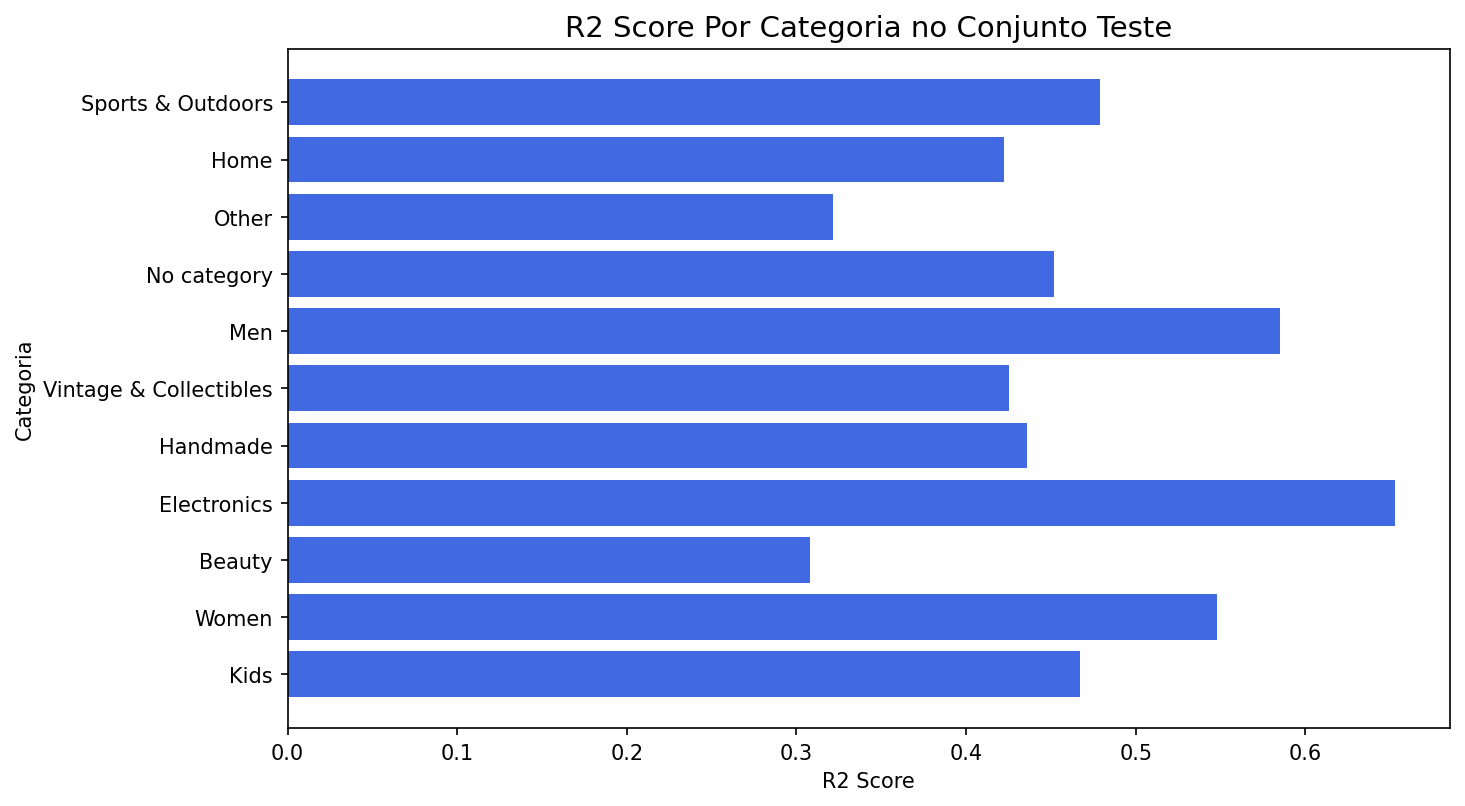

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('R2 Score Por Categoria no Conjunto Teste',fontsize=14)
plt.barh(teste['category_1'].unique(),r2_sc,color='royalblue')
plt.xlabel('R2 Score')
plt.ylabel('Categoria');

In [ ]:
rmse1= []
for k in teste['category_1'].unique():
  rmse1_ = rmse(teste[teste['category_1']==k]['price'],teste[teste['category_1']==k]['y_pred'])
  rmse1.append(rmse1_)

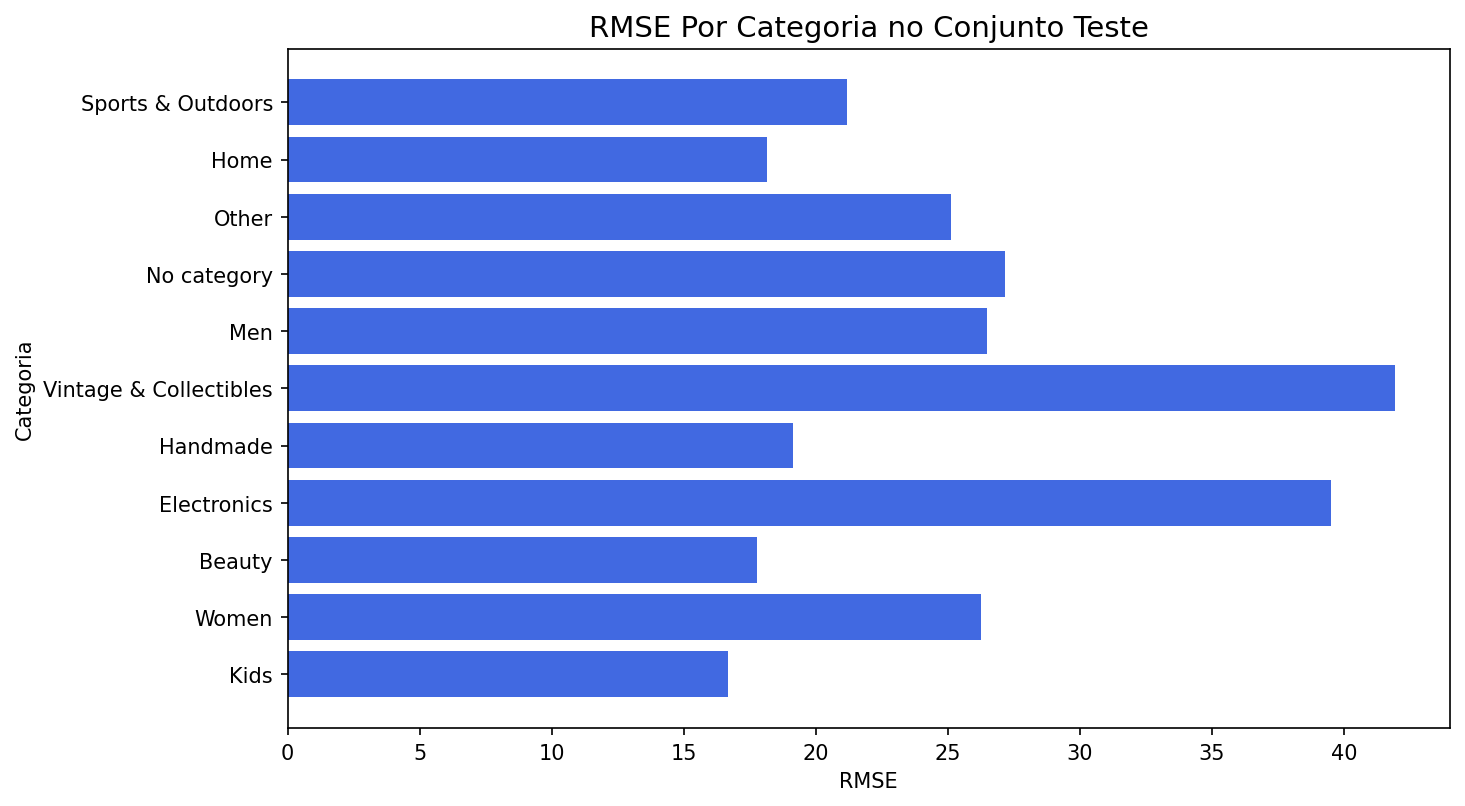

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('RMSE Por Categoria no Conjunto Teste',fontsize=14)
plt.barh(teste['category_1'].unique(),rmse1,color='royalblue')
plt.xlabel('RMSE')
plt.ylabel('Categoria');

In [ ]:
mape1 = []
for k in teste['category_1'].unique():
  mape1_ = mean_absolute_percentage_error(teste[teste['category_1']==k]['price'],teste[teste['category_1']==k]['y_pred'])
  mape1.append(mape1_)

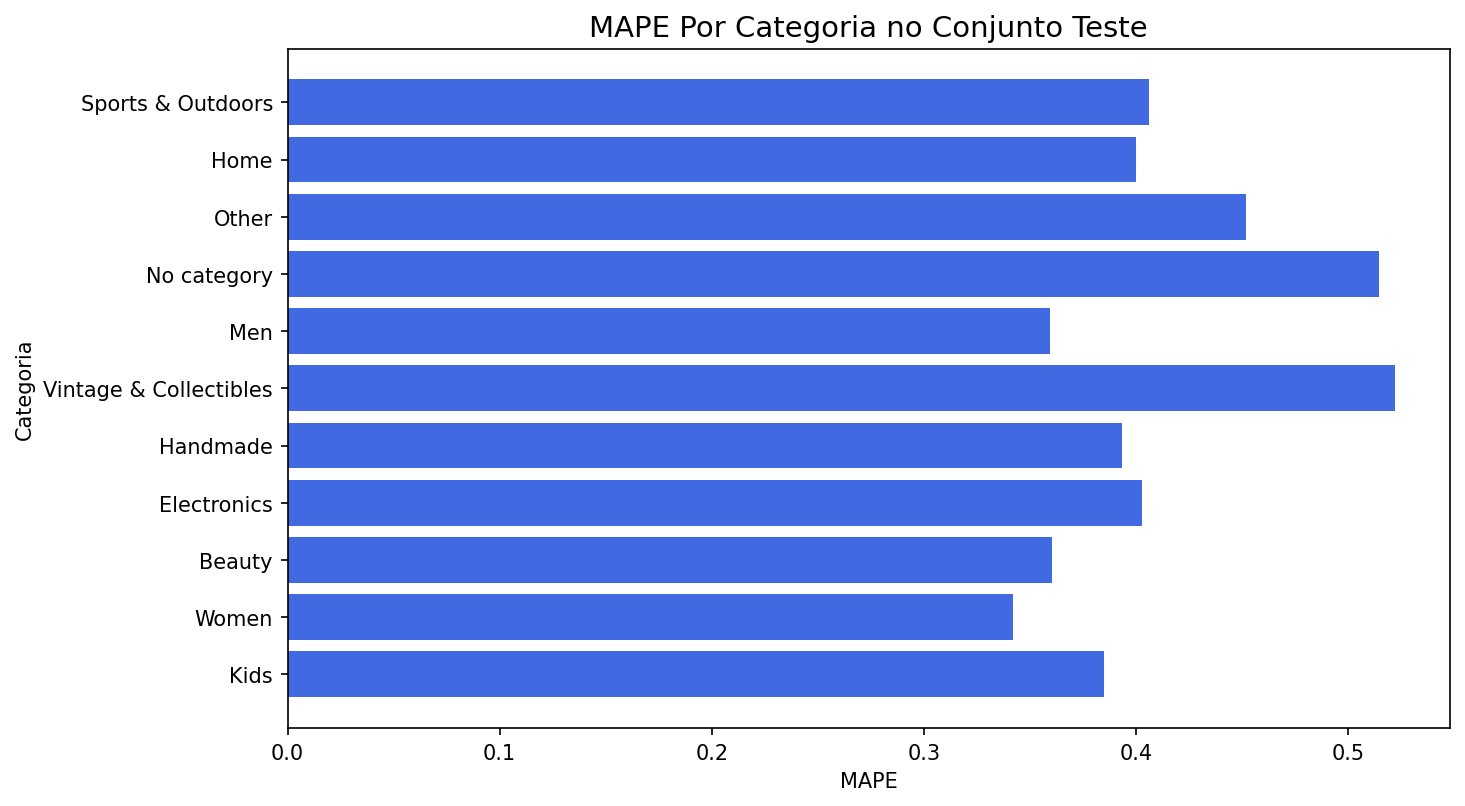

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('MAPE Por Categoria no Conjunto Teste',fontsize=14)
plt.barh(teste['category_1'].unique(),mape1,color='royalblue')
plt.xlabel('MAPE')
plt.ylabel('Categoria');

In [ ]:
rmsle1 = []
for k in teste['category_1'].unique():
  rmsle1_ = mean_squared_log_error(teste[teste['category_1']==k]['price'],teste[teste['category_1']==k]['y_pred'],
                                   squared=False)
  rmsle1.append(rmsle1_)

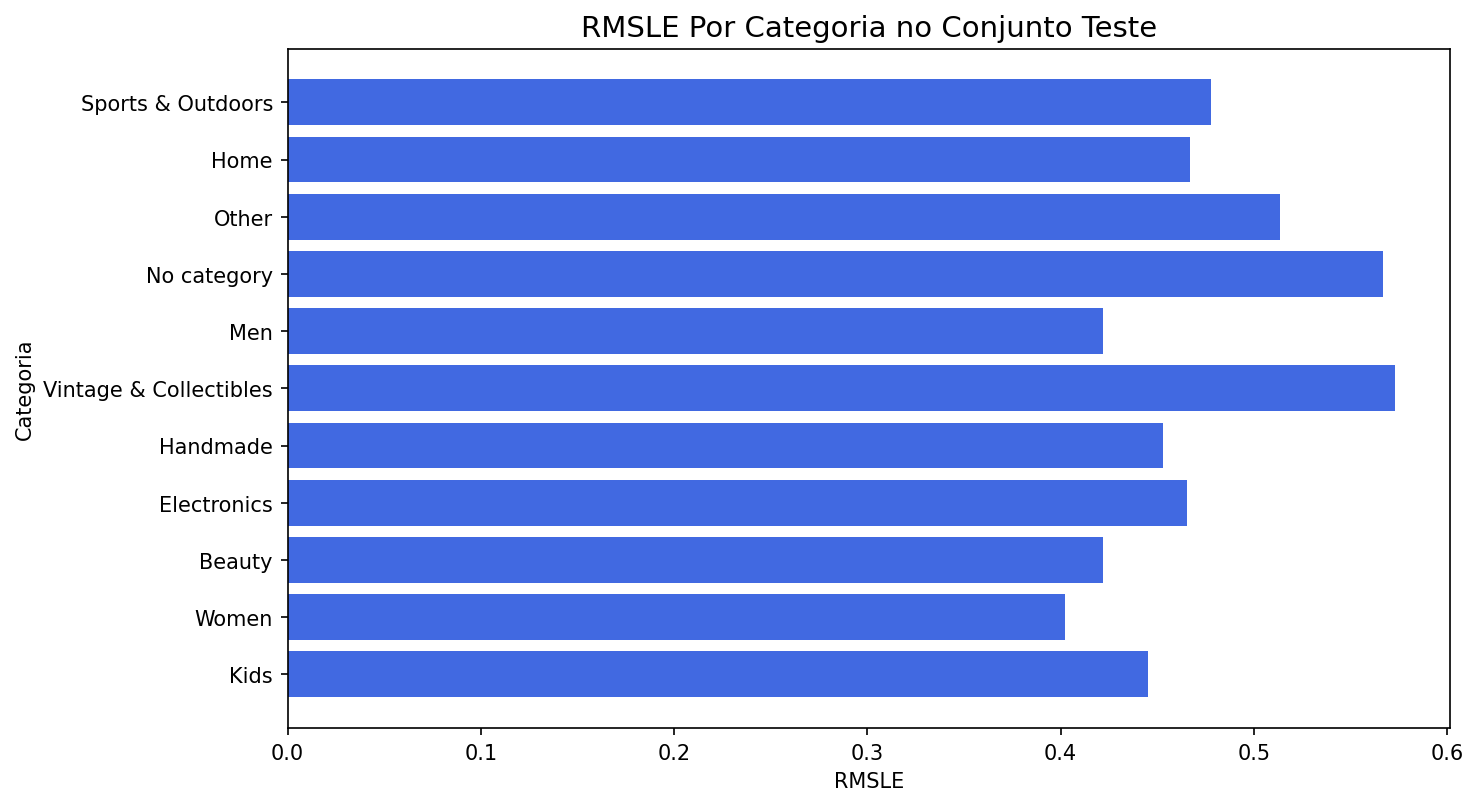

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('RMSLE Por Categoria no Conjunto Teste',fontsize=14)
plt.barh(teste['category_1'].unique(),rmsle1,color='royalblue')
plt.xlabel('RMSLE')
plt.ylabel('Categoria');

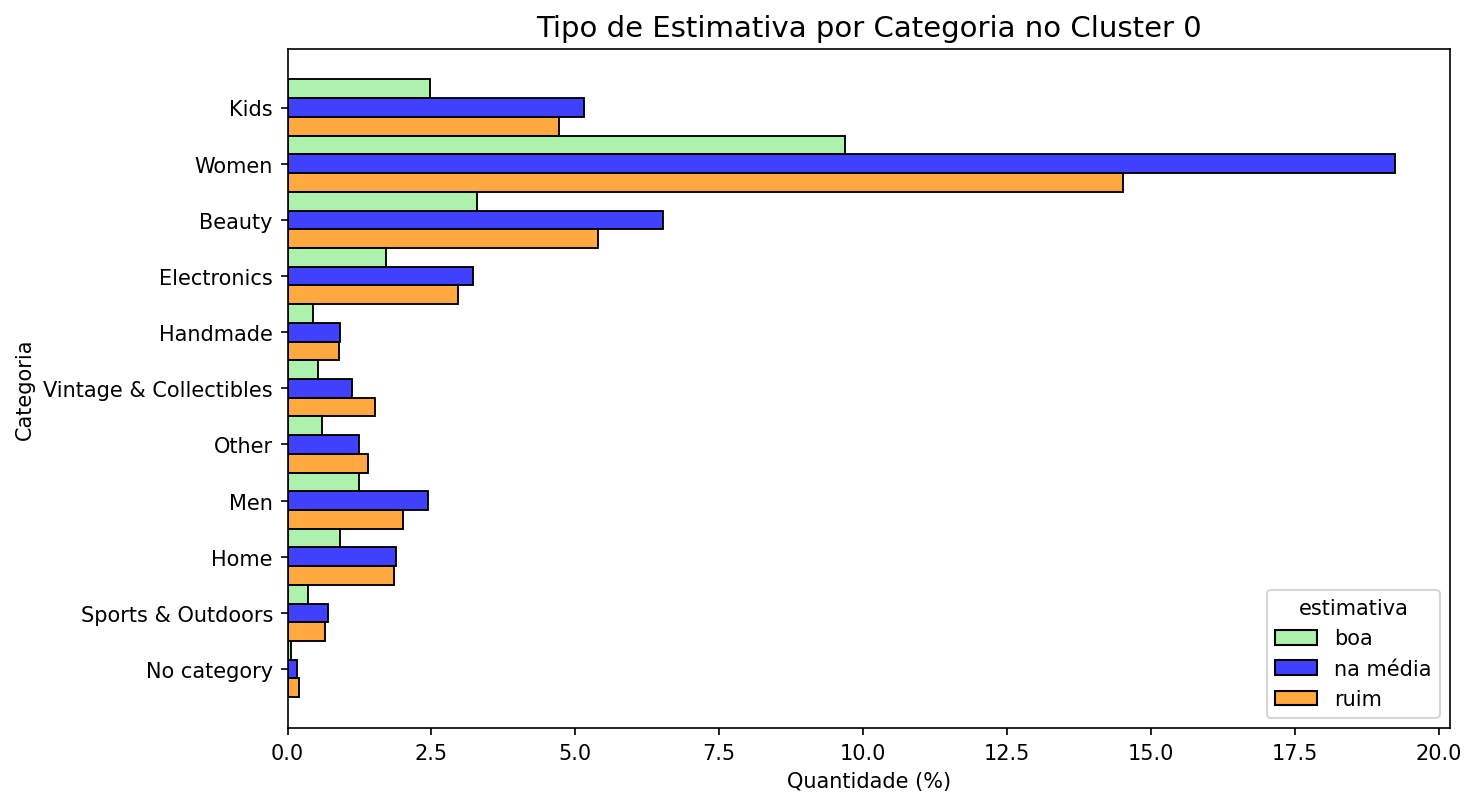

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 0',fontsize=14)
sns.histplot(y='category_1',data=teste[teste['cluster']==0],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

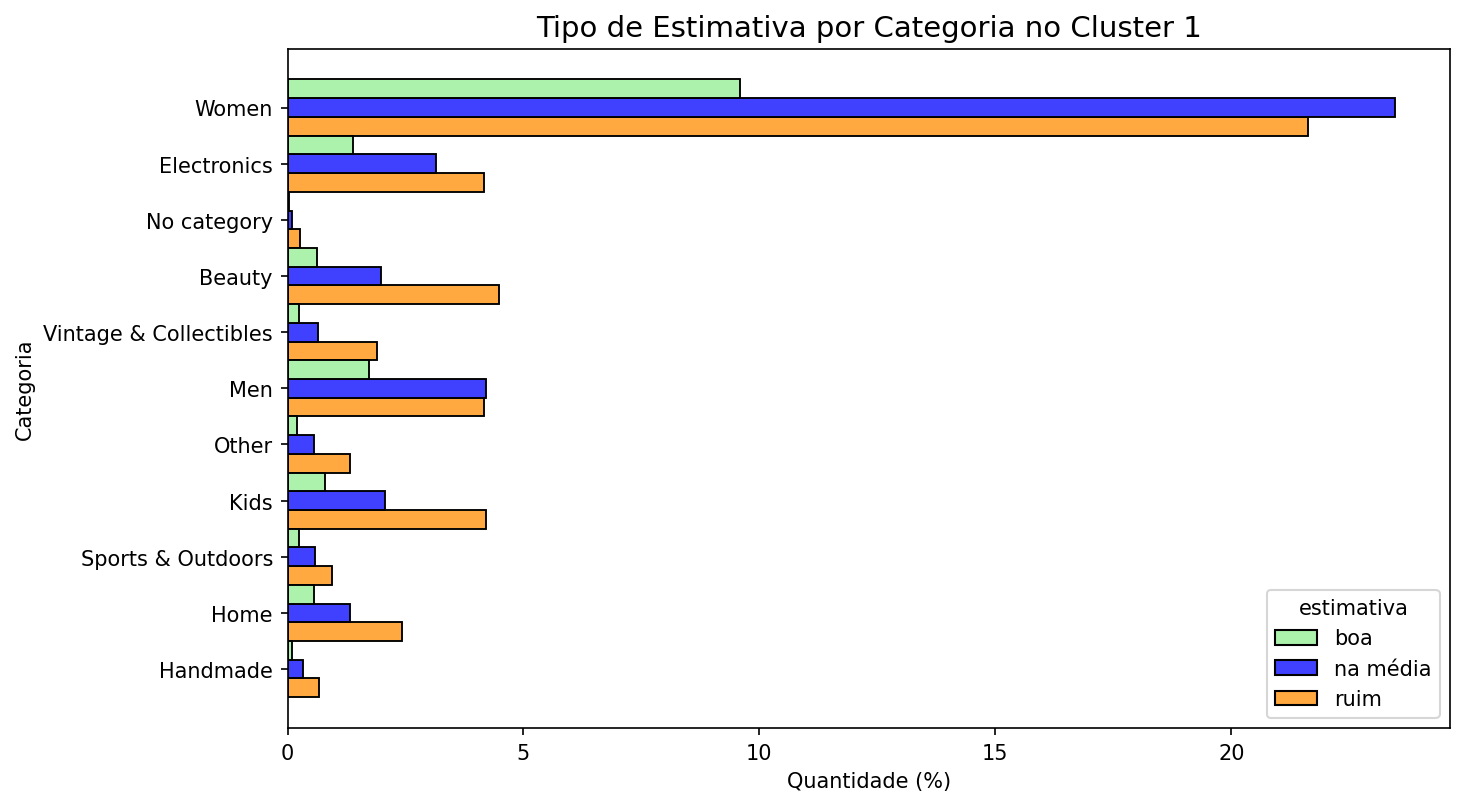

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 1',fontsize=14)
sns.histplot(y='category_1',data=teste[teste['cluster']==1],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

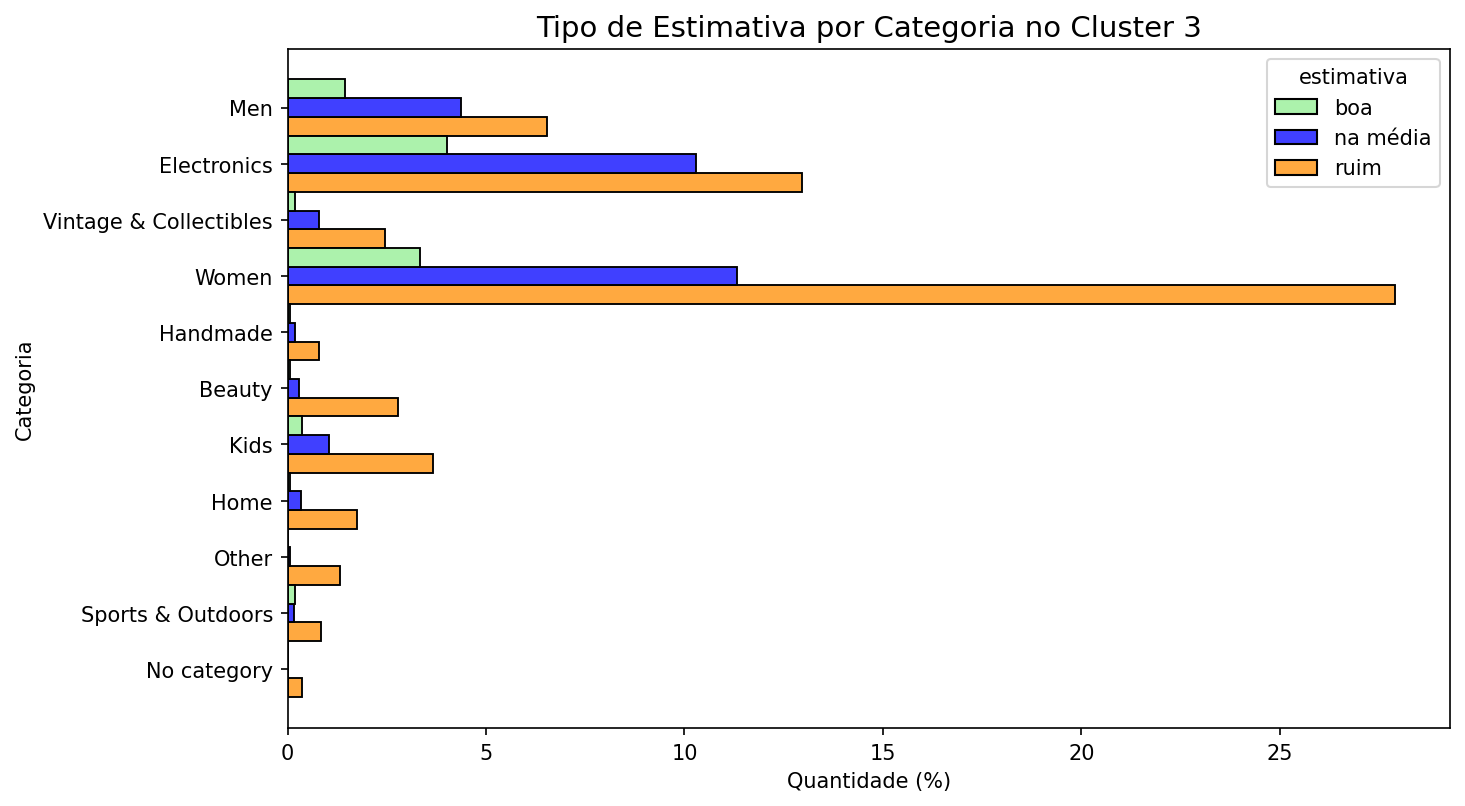

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 3',fontsize=14)
sns.histplot(y='category_1',data=teste[teste['cluster']==3],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

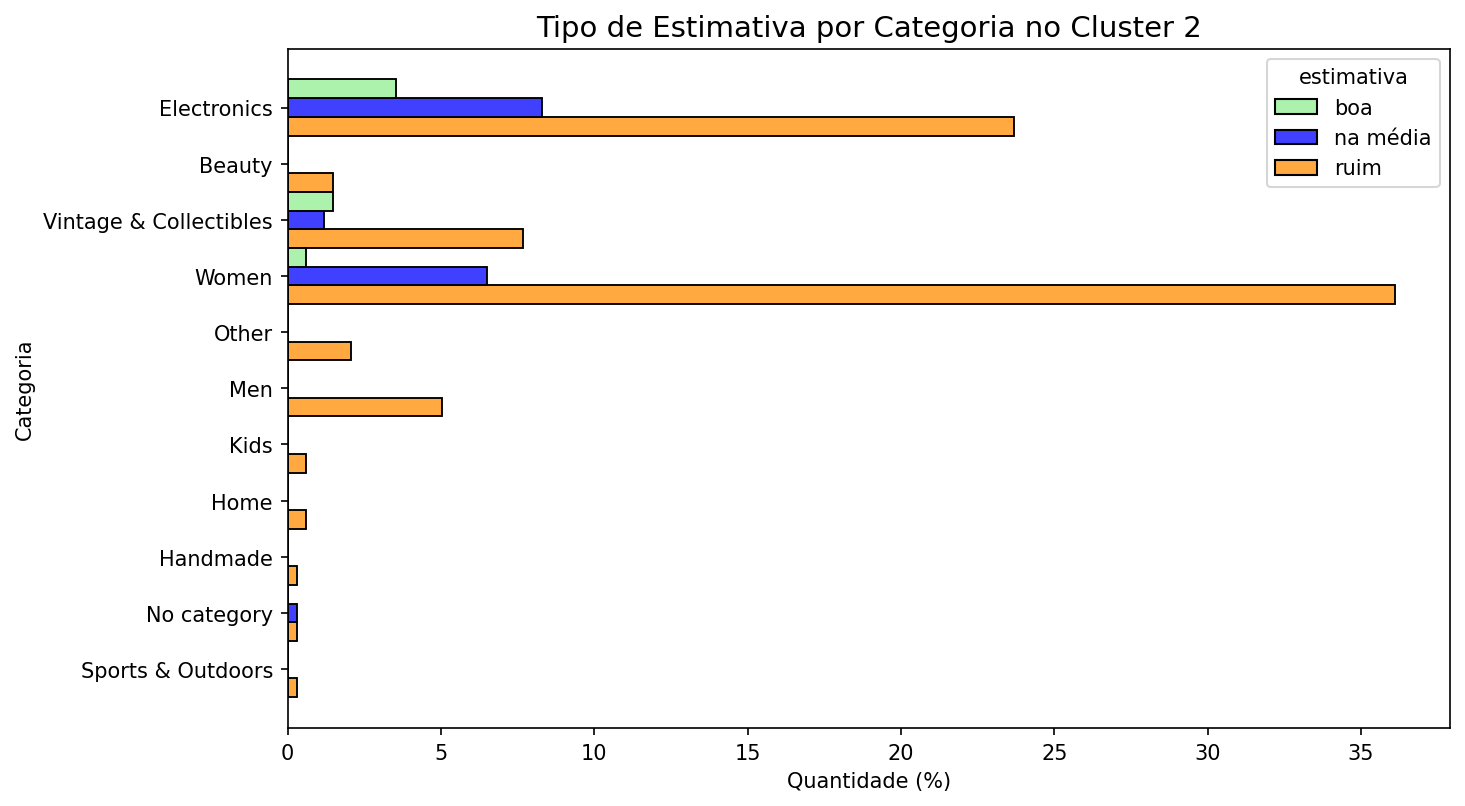

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 2',fontsize=14)
sns.histplot(y='category_1',data=teste[teste['cluster']==2],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

In [ ]:
teste[teste['estimativa']=='boa']['brand_name'].value_counts()[0:20]

No Brand             34295
Nike                  3341
PINK                  3337
Victoria's Secret     2800
LuLaRoe               2040
Lululemon              982
FOREVER 21             917
American Eagle         867
Apple                  862
Rae Dunn               741
Michael Kors           706
Nintendo               662
Sephora                636
Adidas                 567
Disney                 531
Under Armour           529
Bath & Body Works      515
Coach                  514
Old Navy               476
Hollister              443
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

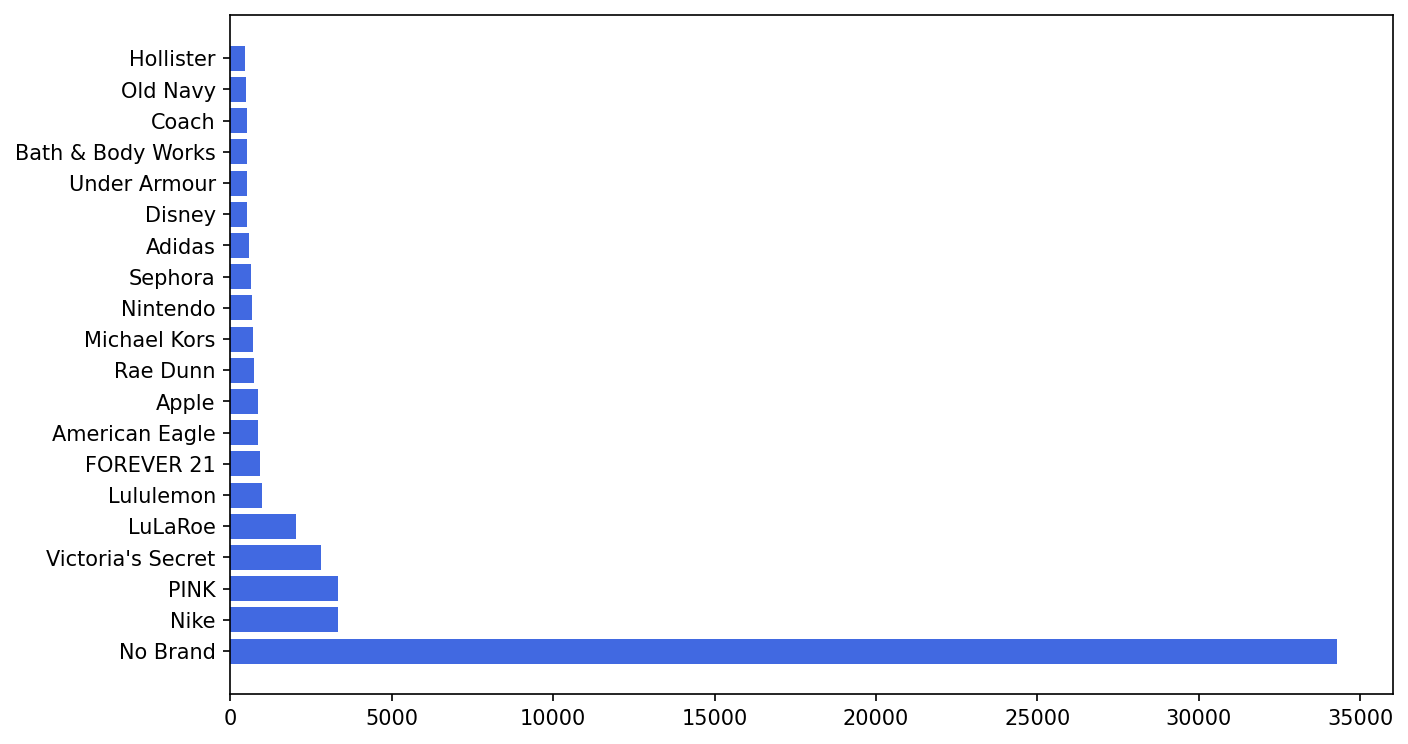

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='boa']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='boa']['brand_name'].value_counts()[0:20],color='royalblue')

In [ ]:
teste[teste['estimativa']=='na média']['brand_name'].value_counts()[0:20]

No Brand             69197
Nike                  6668
PINK                  6573
Victoria's Secret     5595
LuLaRoe               3939
Apple                 1923
FOREVER 21            1871
Lululemon             1763
American Eagle        1725
Michael Kors          1570
Nintendo              1490
Rae Dunn              1419
Sephora               1393
Adidas                1233
Bath & Body Works     1174
Coach                 1162
Disney                1103
Under Armour          1063
Old Navy               973
Hollister              925
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

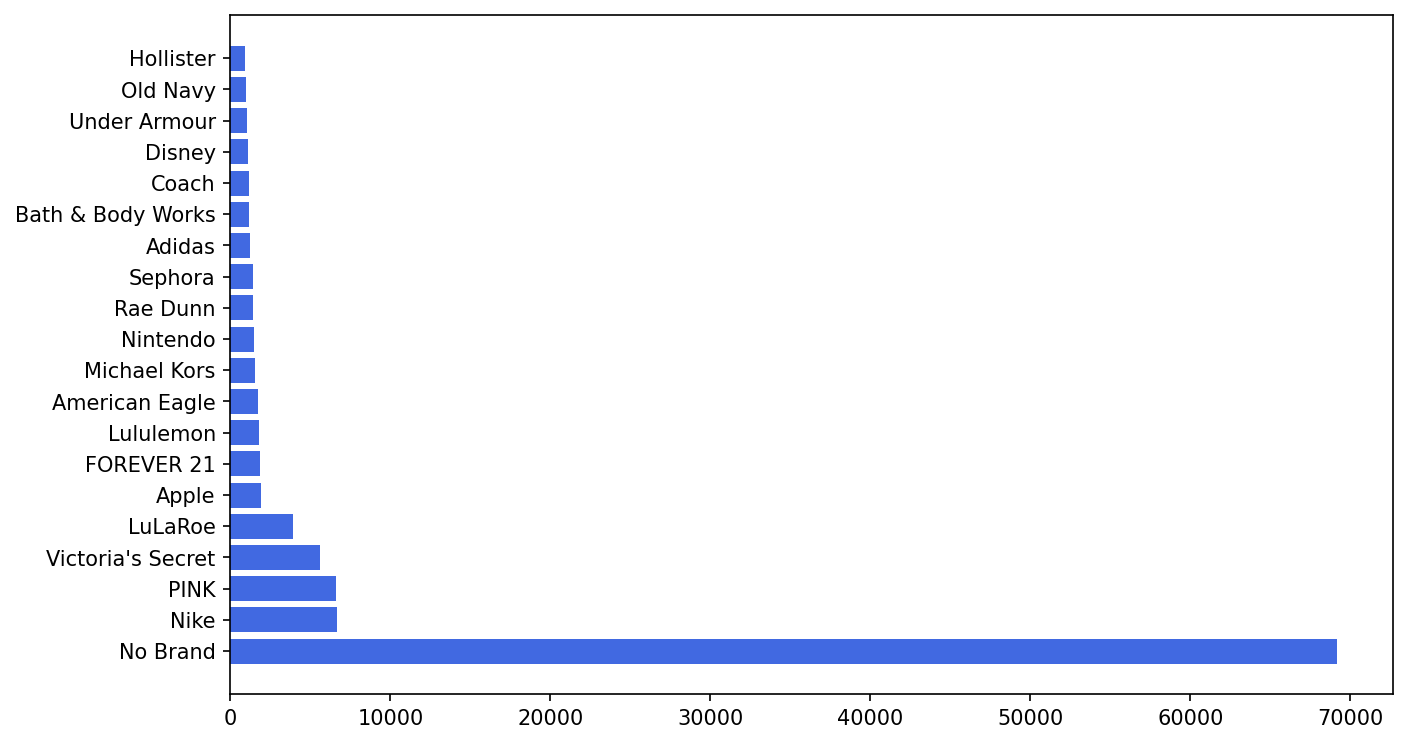

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='na média']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='na média']['brand_name'].value_counts()[0:20],color='royalblue')

In [ ]:
teste[teste['estimativa']=='ruim']['brand_name'].value_counts()[0:20]

No Brand             67149
Nike                  4706
PINK                  4640
Victoria's Secret     4436
LuLaRoe               2337
Nintendo              1888
Apple                 1858
Michael Kors          1472
Sephora               1359
Lululemon             1207
Coach                 1203
FOREVER 21            1193
Rae Dunn              1188
Funko                 1182
Bath & Body Works     1177
Disney                1148
Adidas                1056
American Eagle        1003
Sony                   997
Under Armour           691
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

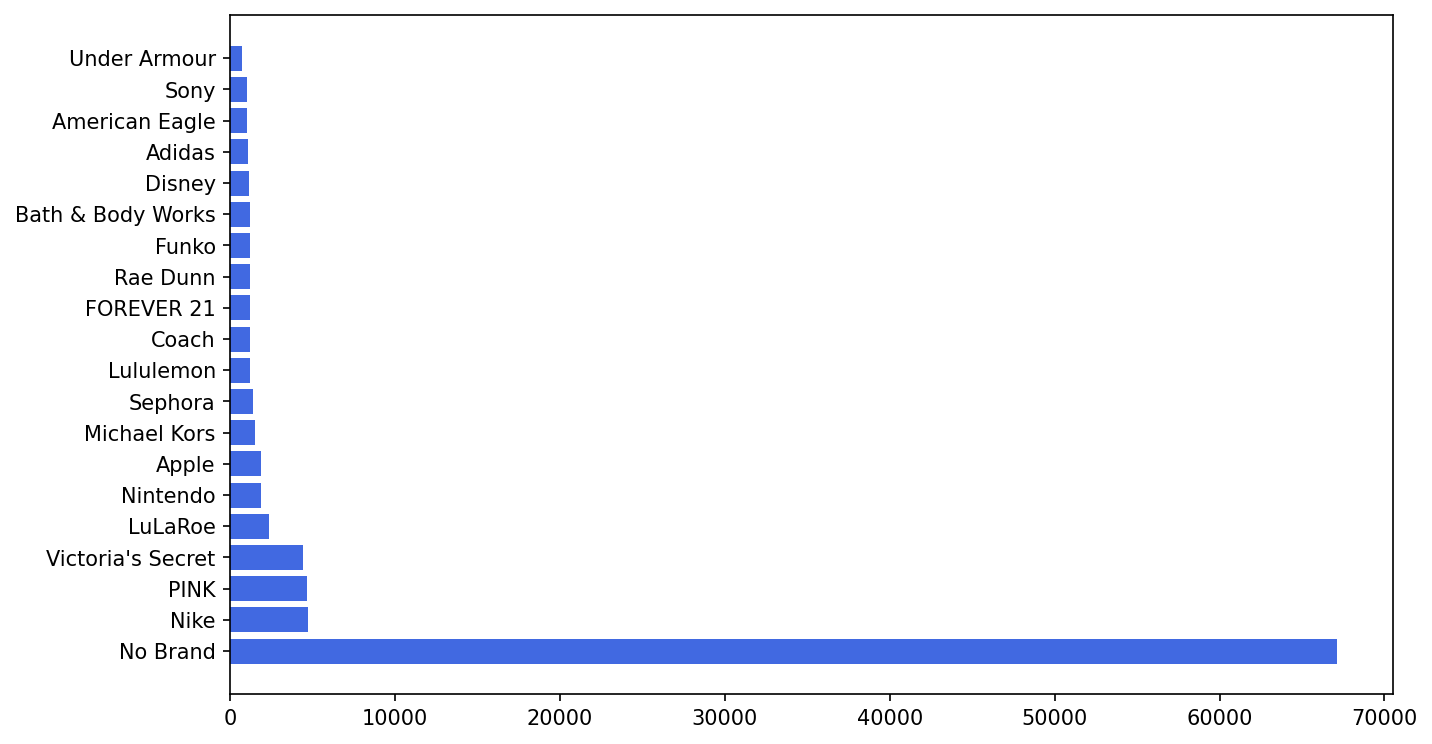

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='ruim']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='ruim']['brand_name'].value_counts()[0:20],color='royalblue')

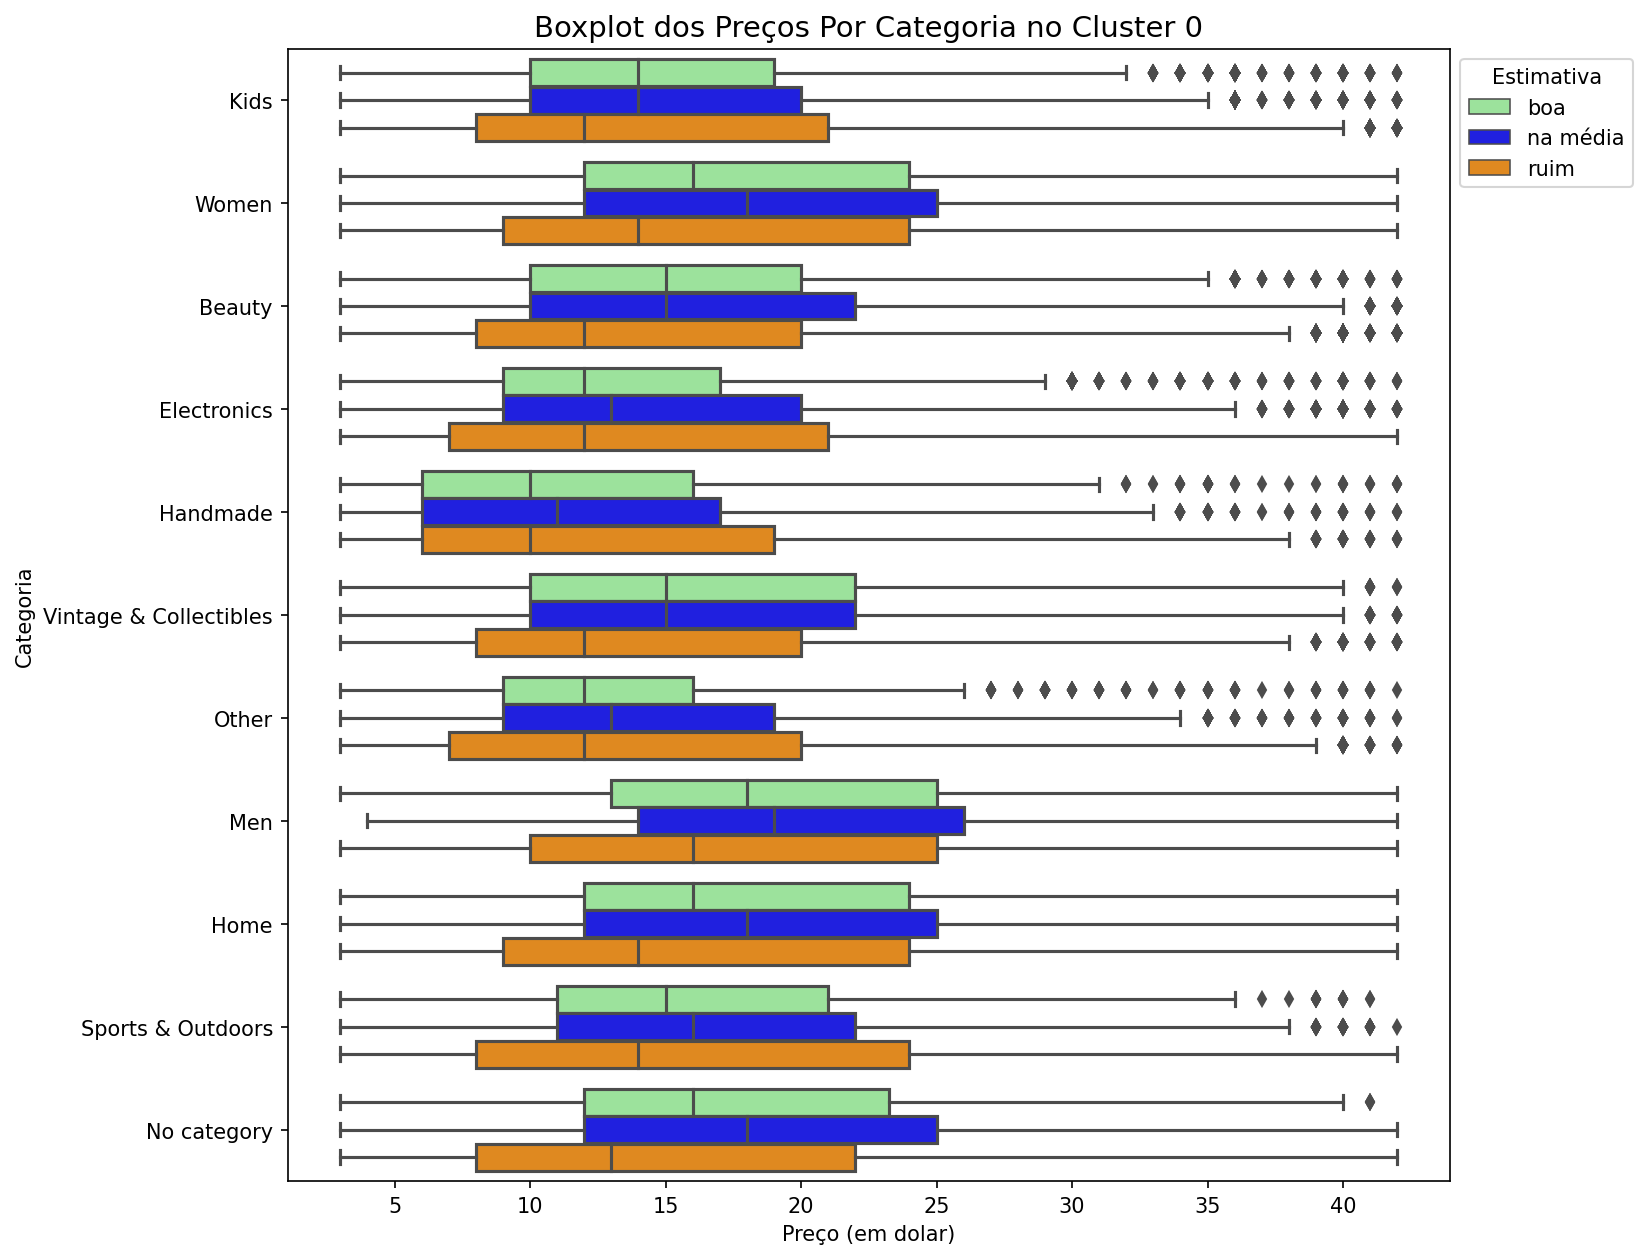

In [ ]:
plt.figure(figsize=(10,10),dpi=150)

ax = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==0],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax.set_title('Boxplot dos Preços Por Categoria no Cluster 0',fontsize=14)
ax.set_xlabel('Preço (em dolar)')
ax.set_ylabel('Categoria')
ax.legend(title='Estimativa')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

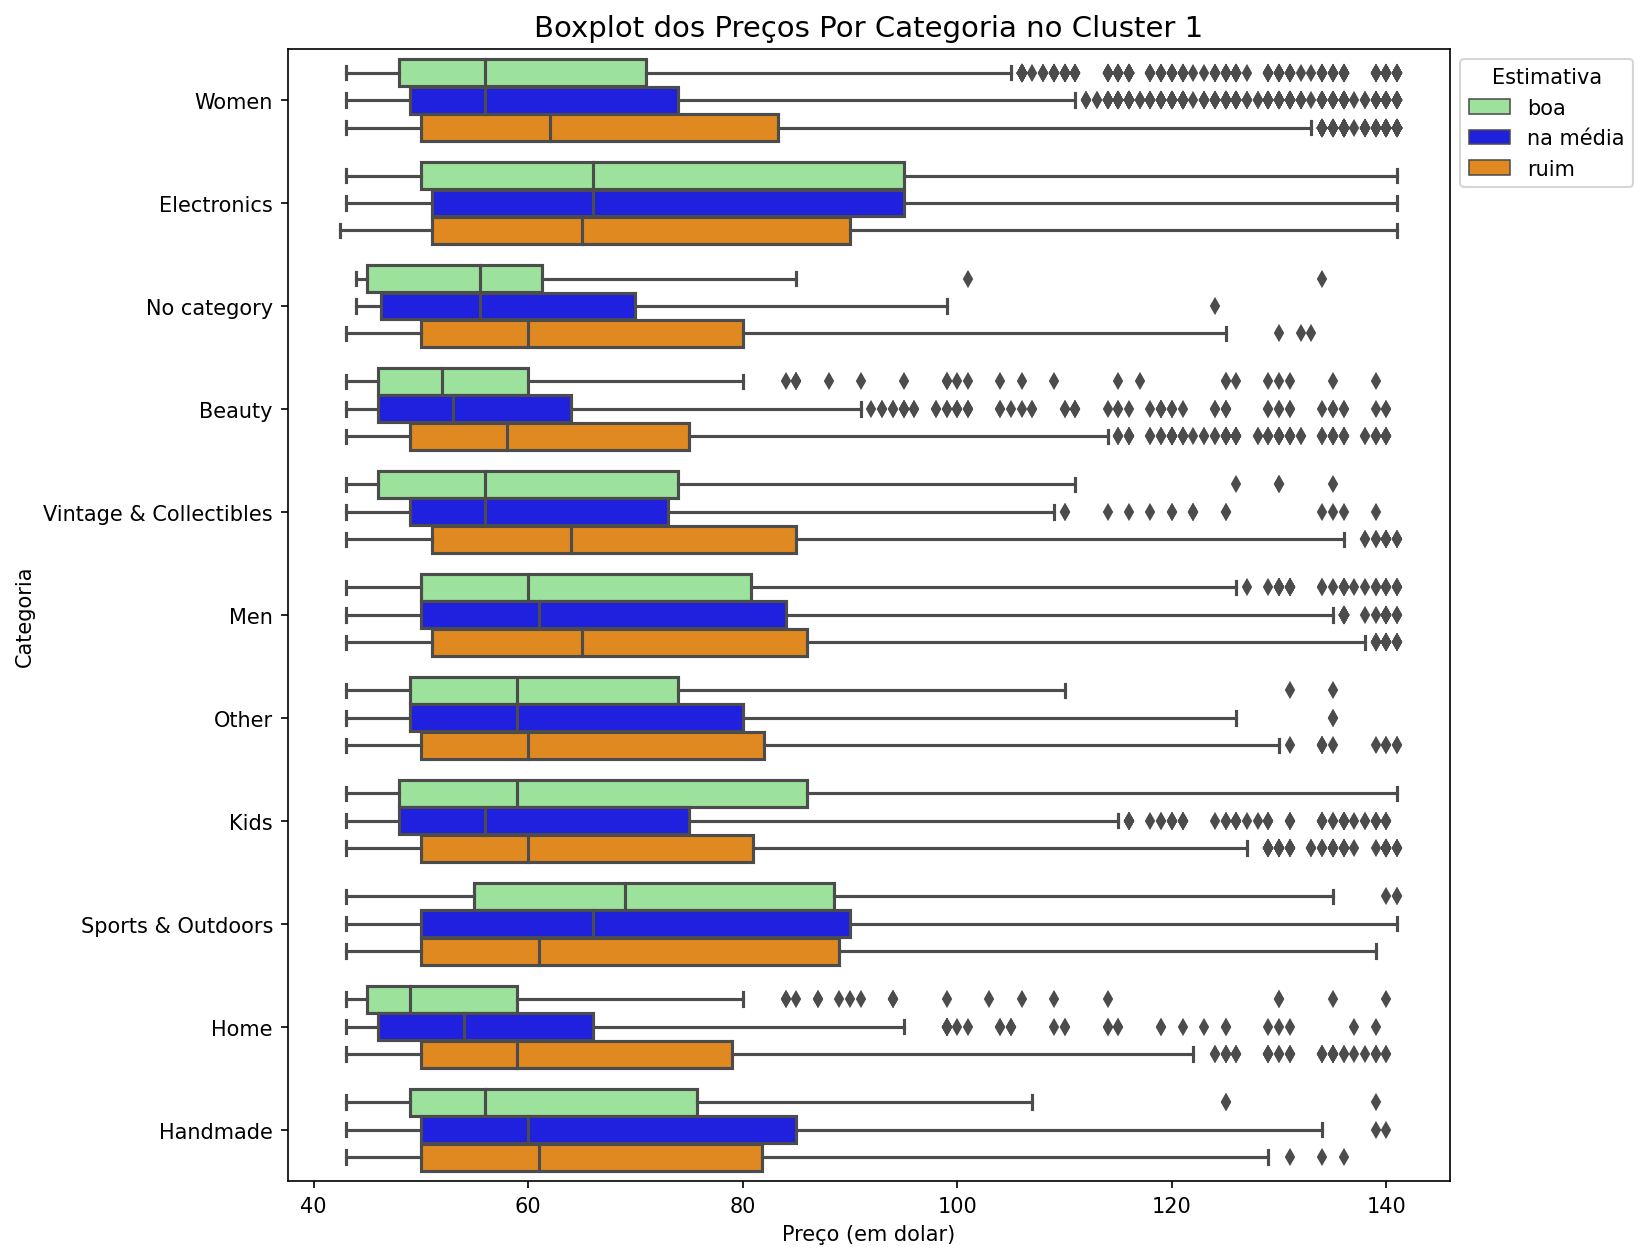

In [ ]:
plt.figure(figsize=(10,10),dpi=150)
ax1 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==1],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax1.set_title('Boxplot dos Preços Por Categoria no Cluster 1',fontsize=14)
ax1.set_xlabel('Preço (em dolar)')
ax1.set_ylabel('Categoria')
ax1.legend(title='Estimativa')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

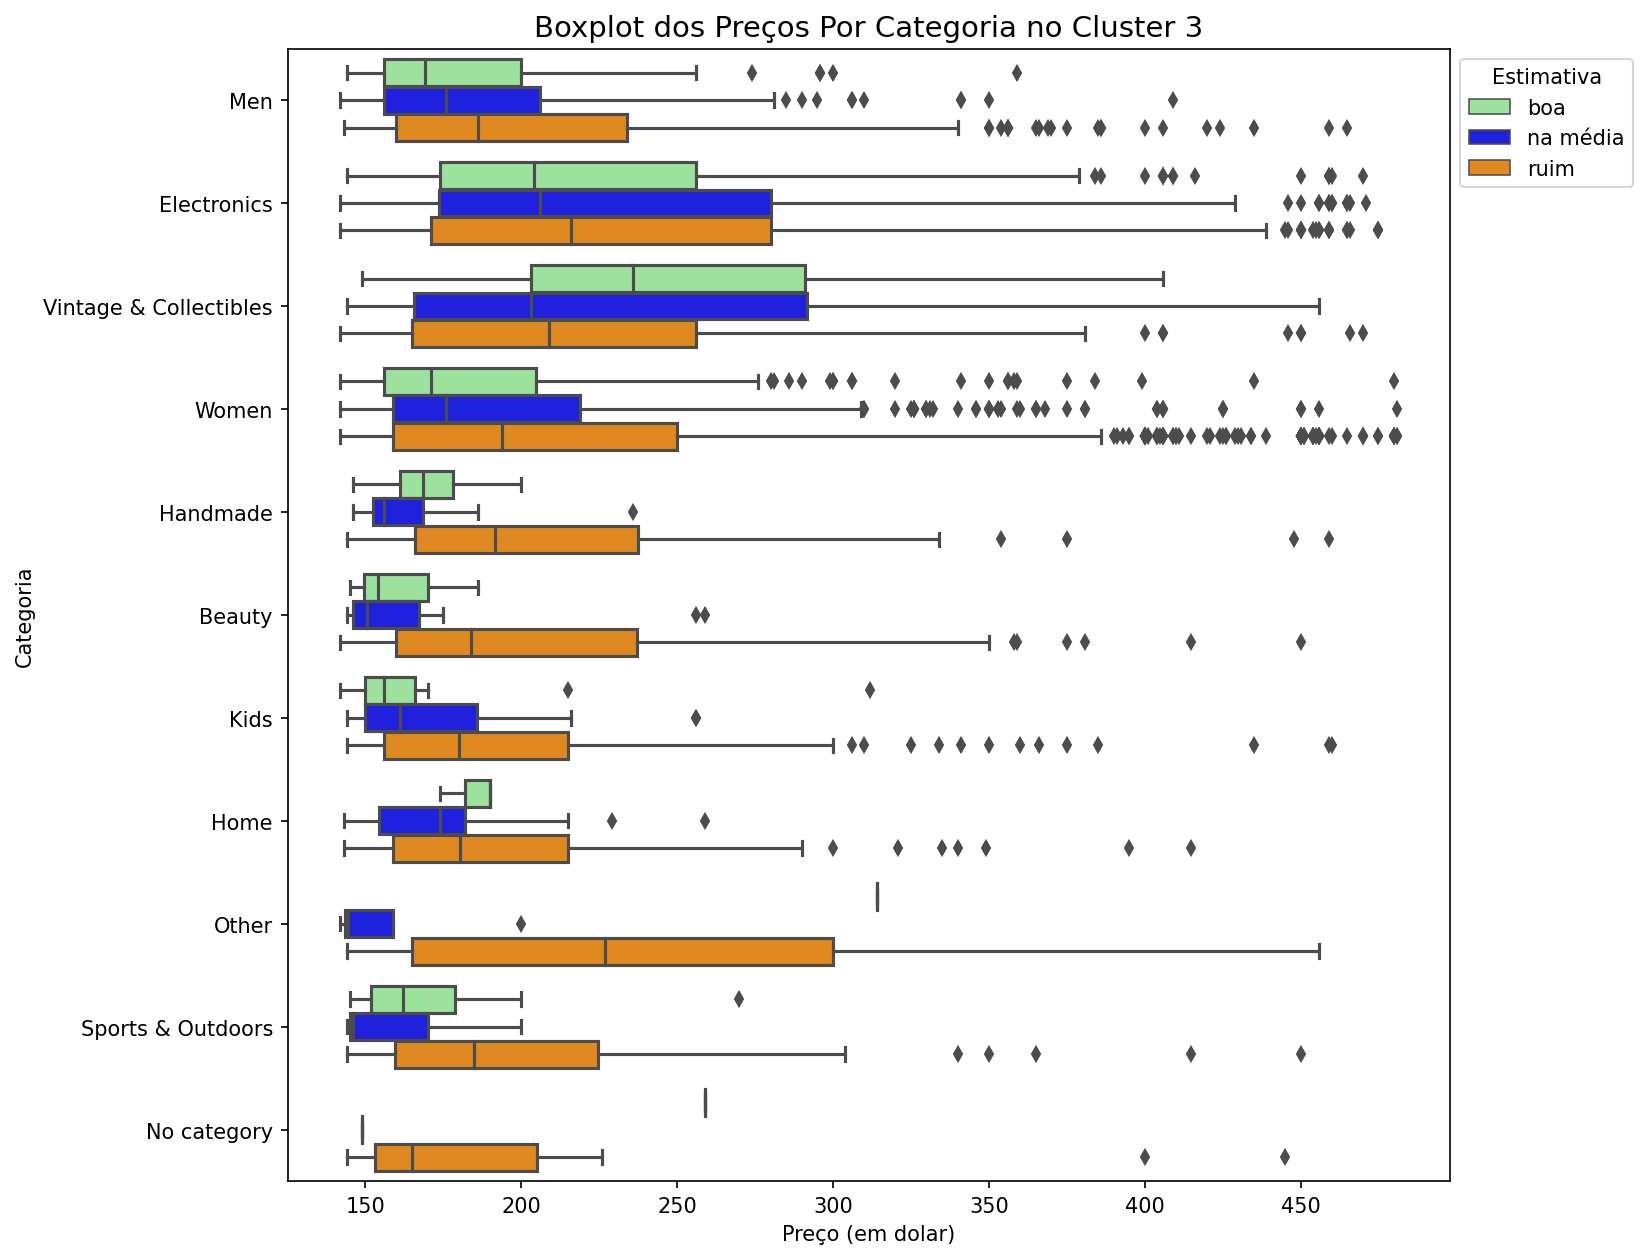

In [ ]:
plt.figure(figsize=(10,10),dpi=150)
ax3 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==3],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax3.set_title('Boxplot dos Preços Por Categoria no Cluster 3',fontsize=14)
ax3.set_xlabel('Preço (em dolar)')
ax3.set_ylabel('Categoria')
ax3.legend(title='Estimativa')
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

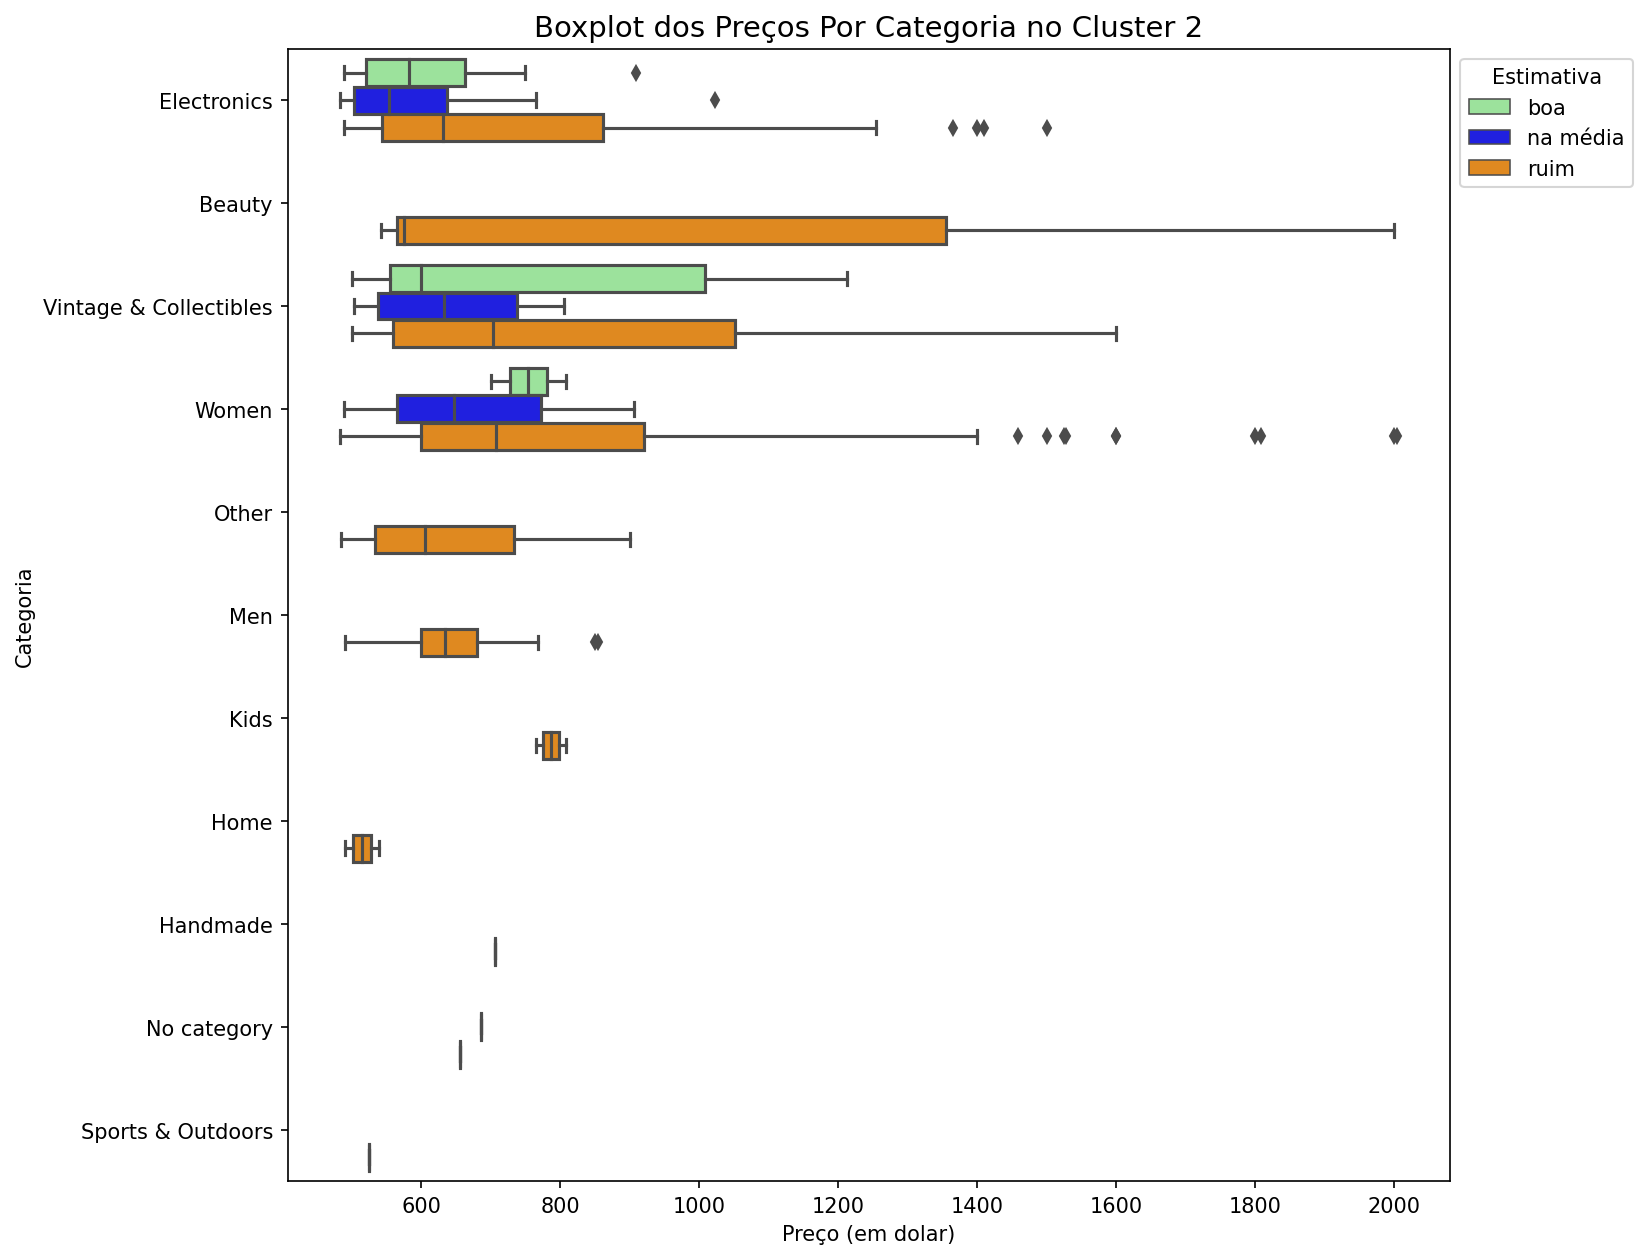

In [ ]:
plt.figure(figsize=(10,10),dpi=150)
ax2 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==2],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax2.set_title('Boxplot dos Preços Por Categoria no Cluster 2',fontsize=14)
ax2.set_xlabel('Preço (em dolar)')
ax2.set_ylabel('Categoria')
ax2.legend(title='Estimativa')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

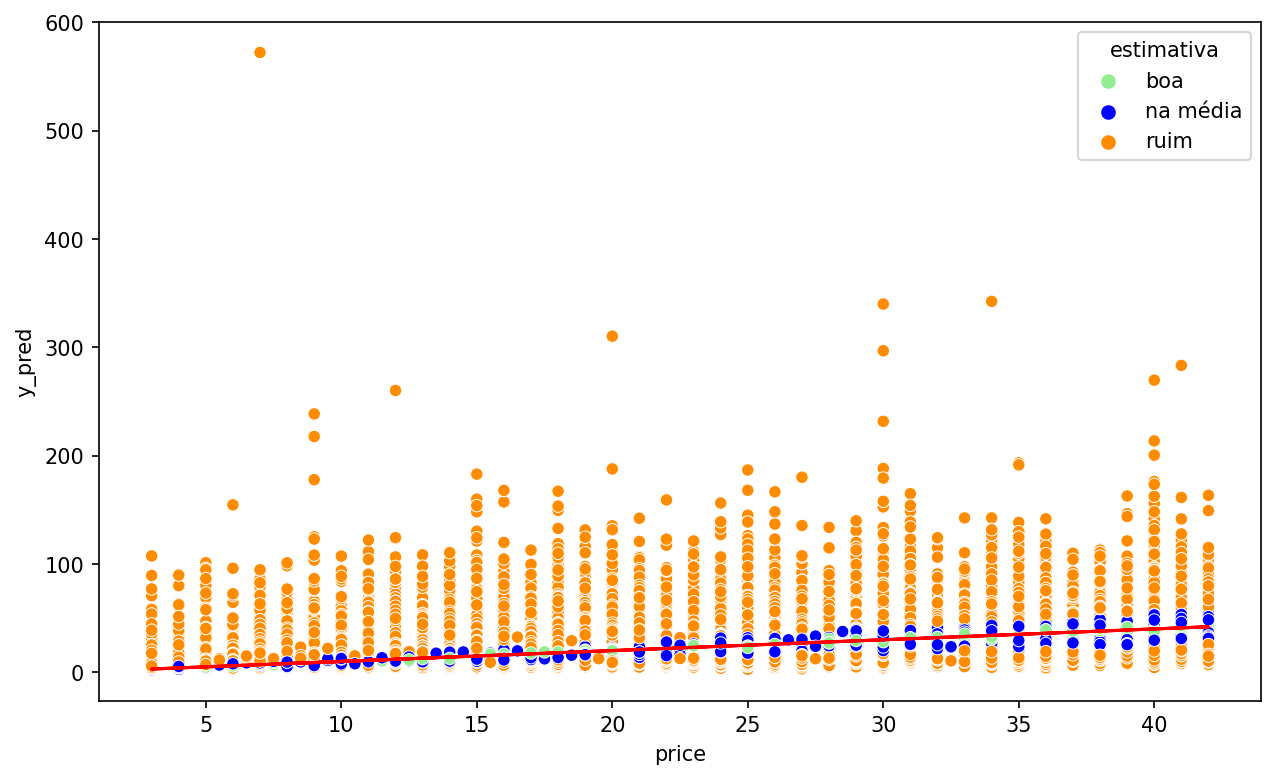

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(teste[teste['cluster']==0]['price'],teste[teste['cluster']==0]['price'],
         color='red')
sns.scatterplot(x='price',y='y_pred',data=teste[teste['cluster']==0],hue='estimativa',
                palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])

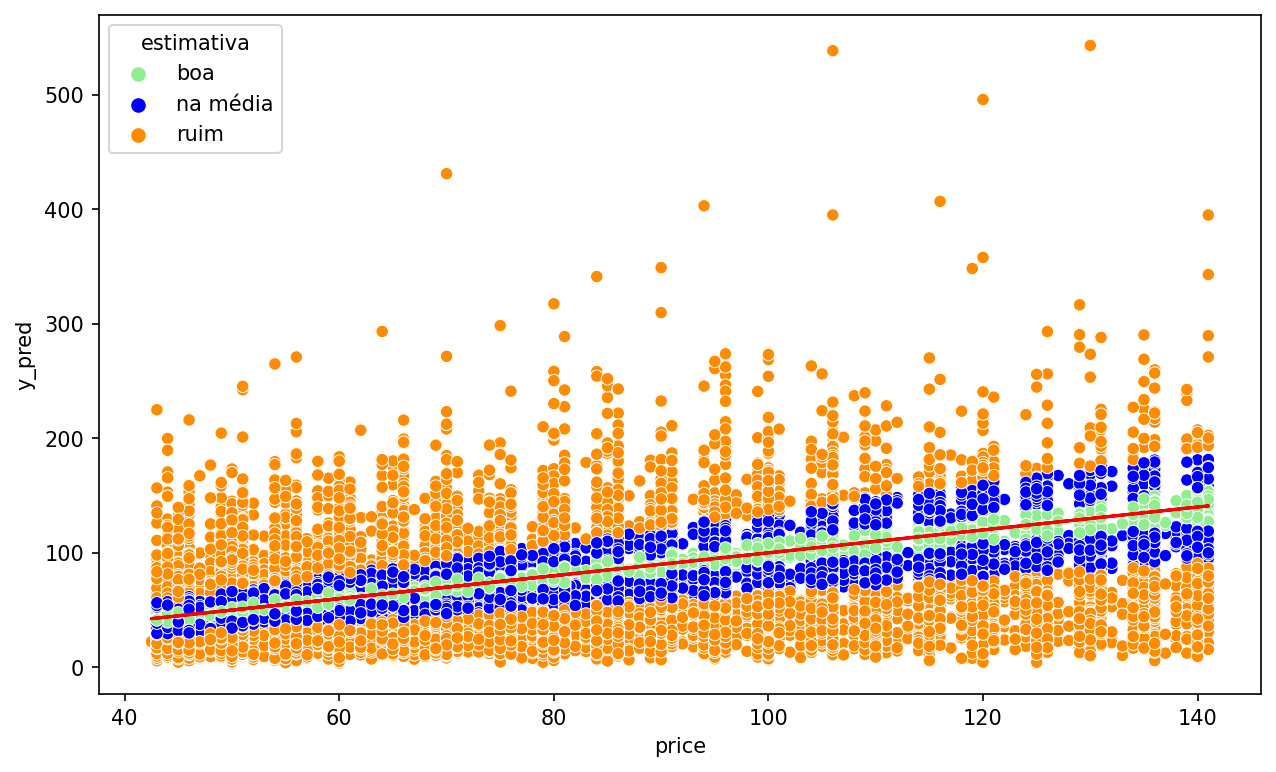

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(teste[teste['cluster']==1]['price'],teste[teste['cluster']==1]['price'],
         color='red')
sns.scatterplot(x='price',y='y_pred',data=teste[teste['cluster']==1],hue='estimativa',
                palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])

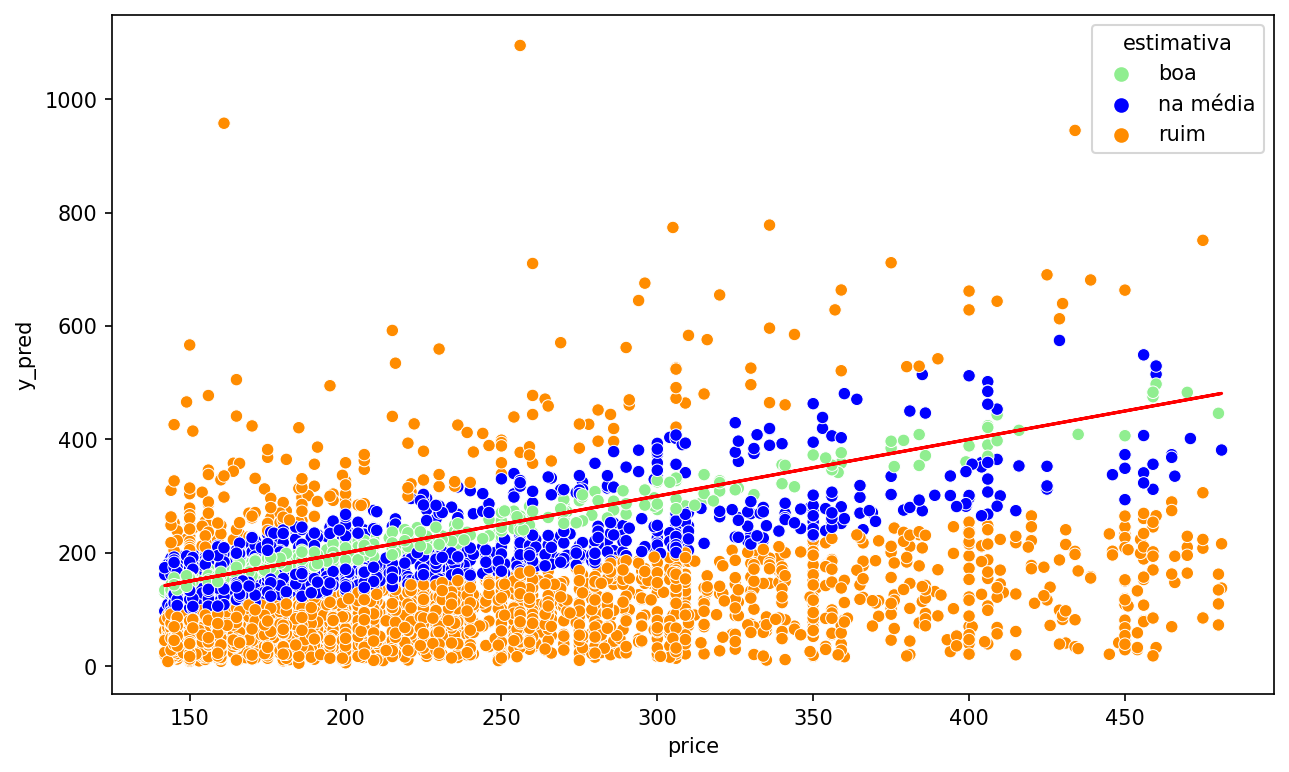

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(teste[teste['cluster']==3]['price'],teste[teste['cluster']==3]['price'],
         color='red')
sns.scatterplot(x='price',y='y_pred',data=teste[teste['cluster']==3],hue='estimativa',
                palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])

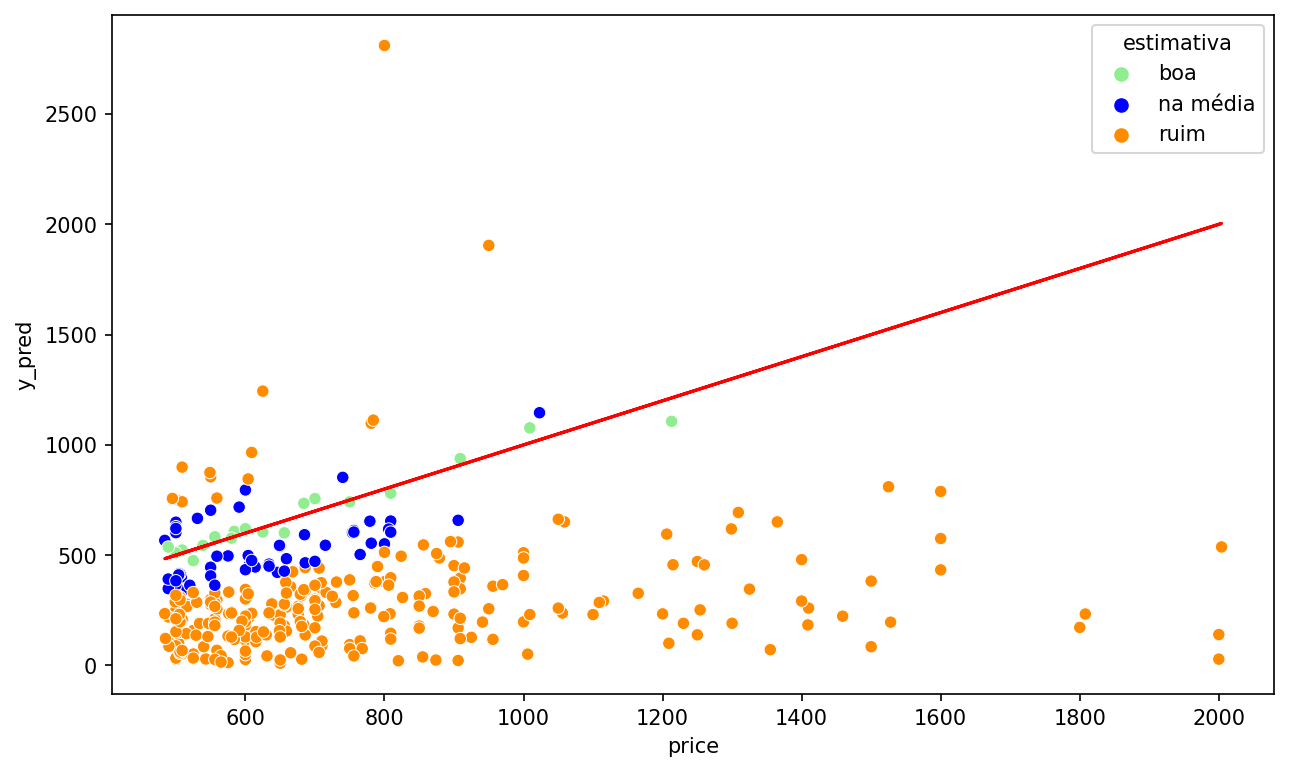

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(teste[teste['cluster']==2]['price'],teste[teste['cluster']==2]['price'],
         color='red')
sns.scatterplot(x='price',y='y_pred',data=teste[teste['cluster']==2],hue='estimativa',
                palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])